<a href="https://colab.research.google.com/github/BiancaHill/Data-Science/blob/main/Bianca_Hill_Unit7ExercisesSF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fitting Curves: Concepts

What you'll do:

- Answer questions about what a GP is, and its relationship to GLMs and splines.
- Practice applying one of: polynomial modeling, b splines, or GPs
- You'll get a chance to read about and try to comprehend a more standard implementation of a GP.

Have fun!

**Task1**:

Why would you ever want to include a polynomial element in a model you built? What's the benefit of using polynomials to model?

Polynomials can make your model more accurate, however, using too high a degree of polynomial can cause over fitting and can lead to the model just connecting the dots. Usually, a simple model will be better but the more complex the relationship between the data, the better a polynomial will work.

**Task2**:

Why would you ever NOT want to include a polynomial element in a model you built?

A linear model would be better to use with a simpler data set or when you think the data will have a linear relationship. Linear models also are easier to interpret, run faster, and usually do less overfitting. Overall, start with the simpler model, you can make it more complicated from there if you need.

**Task3**:

What's the point of using b splines?

B splines consist of piecewise graphs with weight assigned to knots. By making a graph piecewise we can allow the different sections of a data set to control a certain piece of the overall model, making the end result more accurate. The model also adds "weight" to each segment which means it's deciding which segments are more influencial to the model and allowing them to guide it. However, b splines require knots where the pieces connect (the median x values) but unlike GP's, you have to pick the location. So, you'll usually just tell the model to seperate the knots equally and hope for the best which can lead to some error.

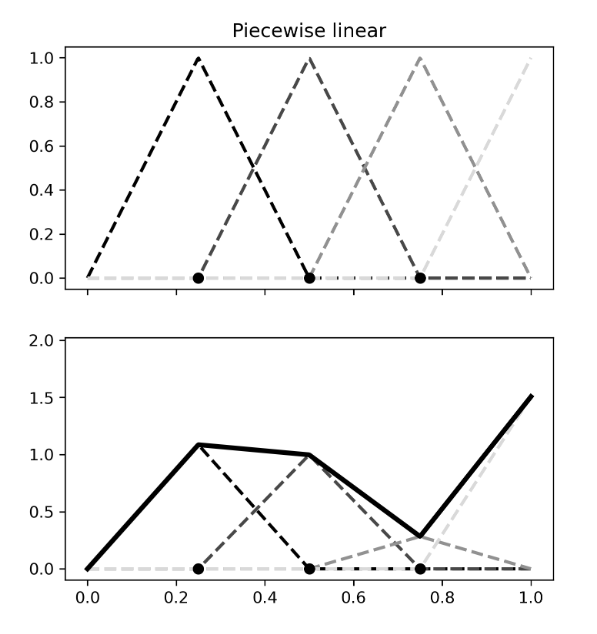

In this example, the top graph shows where all the pieces of the graph want to go. The bottom graph then takes into account the weight and draws the model based off of that. As you can see, the light gray line on the very right of the top graph has more weight, so in the second graph it's pulled the model up instead of letting it stay down like the line next to it wants to.

**Task4**:

Describe what a Gaussian Process is, in your own words. *Don't worry about being correct, just try to explain it to yourself*. I will not grade this question for accuracy.

A Gaussian Process is like a b spline in which it applies knots and weight to create the model. However, unlike a b spline with a set number of knots that you tell it to have and the location of them, the gaussian process makes every single data point a knot. So it's zoomed in super close with tons and tons of piecewise functions, making it supposedly super accurate but usually just leads to overfitting. Most computers aren't able to run a gausissian process because it has millions of knots depending on how many data points you have with interactions between them all which would just make your computer explode. Most people do smaller gaussian processes instead of the full thing.

**Task5**:

Refit a model to the howell data, using one of the following: polynomial model, b splines, or GPs.
Plot the posterior predictive check on a scatter plot

You only need to use one . Remember, the simpler the model is, the better (usually).

Hint: If you use a polynomial or bspline, try a disdributional model


In [1]:
!pip install git+https://github.com/pydata/xarray.git
!pip install bambi

  Cloning https://github.com/pydata/xarray.git to /tmp/pip-req-build-a0ifem5a
  Running command git clone --filter=blob:none --quiet https://github.com/pydata/xarray.git /tmp/pip-req-build-a0ifem5a
  Resolved https://github.com/pydata/xarray.git to commit 4bbab48cacf94ff285475bd7b7abeea3b2ea888f
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for xarray: filename=xarray-2025.1.3.dev16+g4bbab48c-py3-none-any.whl size=1255523 sha256=3de1af5b4755b599331b7334a16daf0d97d3c3887fa154eab65bdc7dd49fe8cc
  Stored in directory: /tmp/pip-ephem-wheel-cache-nfvw_mkt/wheels/15/f9/46/ac58ec95d7761bd0b92f54d99c5d132719866f63745c3702ed
Successfully built xarray
  Attempting uninstall: xarray
    Found existing installation: xarray 2025.1.2
    Uninstalling xarray-2025.1.2:
      Successfully uninstalled xarray-2025.1.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.2/109.2 kB 2.7 MB/s eta 0:00:00
   ━

In [2]:
import numpy as np
import pandas as pd
import arviz as az
import matplotlib.pyplot as plt
import xarray as xr
import bambi as bmb

In [3]:
#downloads the data from my github
howell = pd.read_csv('https://raw.githubusercontent.com/thedarredondo/data-science-fundamentals/main/Data/howell.csv')

In [4]:
howell

,height,weight,age,male
0,151.765,47.825606,63.0,1
1,139.700,36.485807,63.0,0
2,136.525,31.864838,65.0,0
3,156.845,53.041914,41.0,1
4,145.415,41.276872,51.0,0
...,...,...,...,...
539,145.415,31.127751,17.0,1
540,162.560,52.163080,31.0,1
541,156.210,54.062497,21.0,0
542,71.120,8.051258,0.0,1


In [ ]:
#linear model
formula_howell1 = bmb.Formula(
    "height ~ poly(weight, degree=1)",
    "sigma ~ weight"
)

model_poly1 = bmb.Model(formula_howell1, howell)
idata_poly1 = model_poly1.fit(idata_kwargs={"log_likelihood":True})

Output()

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


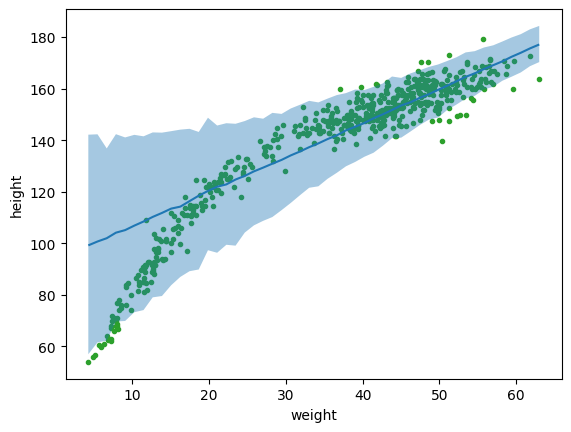

In [ ]:
bmb.interpret.plot_predictions(model_poly1, idata_poly1, "weight", pps=True)
plt.plot(howell.weight, howell.height, "C2.", zorder=-3)

In [ ]:
#poly degree 2 model
formula_howell2 = bmb.Formula(
    "height ~ poly(weight, degree=2)",
    "sigma ~ weight"
)

model_poly2 = bmb.Model(formula_howell2, howell)
idata_poly2 = model_poly2.fit(idata_kwargs={"log_likelihood":True})

Output()

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


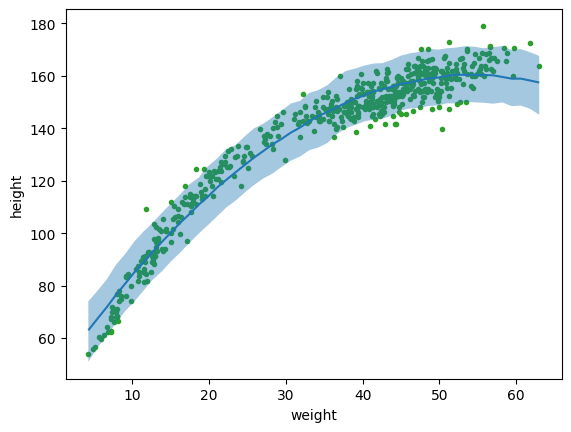

In [ ]:
bmb.interpret.plot_predictions(model_poly2, idata_poly2, "weight", pps=True)
plt.plot(howell.weight, howell.height, "C2.", zorder=-3)

In [ ]:
#poly degree 3 model
formula_howell3 = bmb.Formula(
    "height ~ poly(weight, degree=3)",
    "sigma ~ weight"
)

model_poly3 = bmb.Model(formula_howell3, howell)
idata_poly3 = model_poly3.fit(idata_kwargs={"log_likelihood":True})

Output()

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


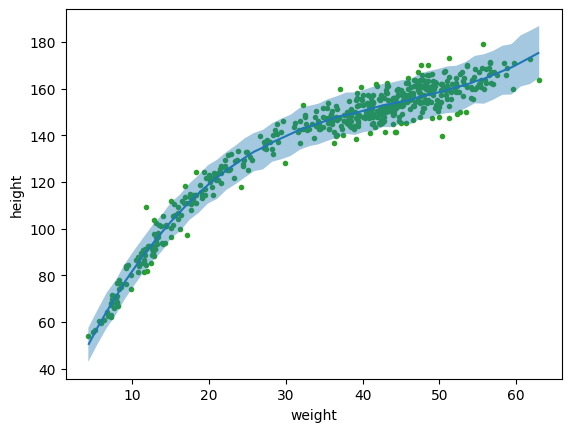

In [ ]:
bmb.interpret.plot_predictions(model_poly3, idata_poly3, "weight", pps=True)
plt.plot(howell.weight, howell.height, "C2.", zorder=-3)

In [ ]:
#poly degree 4 model
formula_howell4 = bmb.Formula(
    "height ~ poly(weight, degree=4)",
    "sigma ~ weight"
)

model_poly4 = bmb.Model(formula_howell4, howell)
idata_poly4 = model_poly4.fit(idata_kwargs={"log_likelihood":True})

Output()

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


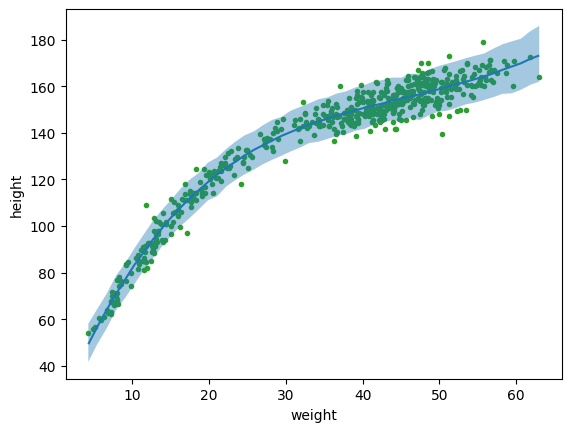

In [ ]:
bmb.interpret.plot_predictions(model_poly4, idata_poly4, "weight", pps=True)
plt.plot(howell.weight, howell.height, "C2.", zorder=-3)

In [5]:
#poly degree 5 model
formula_howell5 = bmb.Formula(
    "height ~ poly(weight, degree=5)",
    "sigma ~ weight"
)

model_poly5 = bmb.Model(formula_howell5, howell)
idata_poly5 = model_poly5.fit(idata_kwargs={"log_likelihood":True})

Output()

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


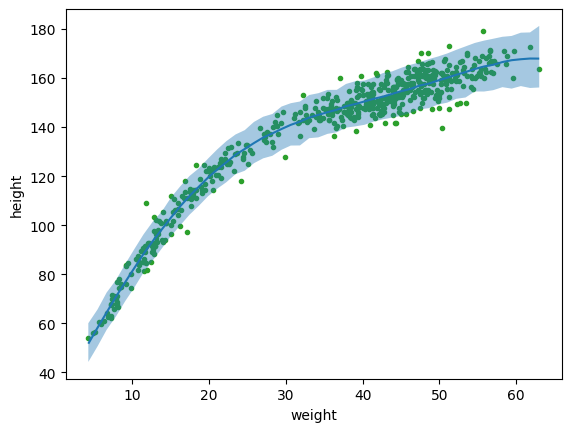

In [6]:
bmb.interpret.plot_predictions(model_poly5, idata_poly5, "weight", pps=True)
plt.plot(howell.weight, howell.height, "C2.", zorder=-3)

In [7]:
#poly degree 6 model
formula_howell6 = bmb.Formula(
    "height ~ poly(weight, degree=6)",
    "sigma ~ weight"
)

model_poly6 = bmb.Model(formula_howell6, howell)
idata_poly6 = model_poly6.fit(idata_kwargs={"log_likelihood":True})

Output()

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


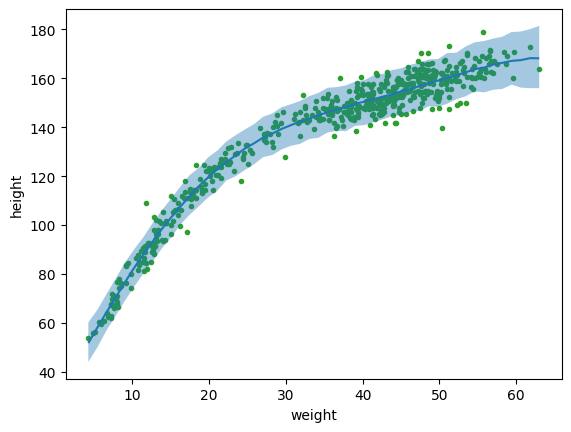

In [9]:
bmb.interpret.plot_predictions(model_poly6, idata_poly6, "weight", pps=True)
plt.plot(howell.weight, howell.height, "C2.", zorder=-3)

I think the best model for this data is the polynomial of degree 5 because after running and comparing it with a degree 6 model, it doesn't seem to be looking a whole lot better, it's pretty much the same thing. Both models are covering both ends of the model and matching the curve of the data, increasing the degree too much of a data set this simple will likely just lead to overfitting.

**Task6**:

Read the article on the pymc website about GP implementation on the Mauna Loa CO$_{2}$ data combined with CO$_{2}$ ice core data from the south pole.
[Link here.](https://www.pymc.io/projects/examples/en/latest/gaussian_processes/GP-MaunaLoa2.html)

Write down one thing you learned about GPs from reading the article.

Note: You probably won't understand anything in this article. The main point of this task is to hammer home that good GP implementations are extremely technical.

- Heaviside Step Functions

For models such as global warming, you'll have to split it up into two piecewise functions since it's starts with little change and suddenly jumps to lots of change once people show up. The Heavistep function is used to find where exactly that shift happens or the changepoint and then make that transition smoother. So, instead of being a nice wave looking thing and then all of a sudden a straight line up once it hits 1760, we have a more gradual shift.

Here's an example:

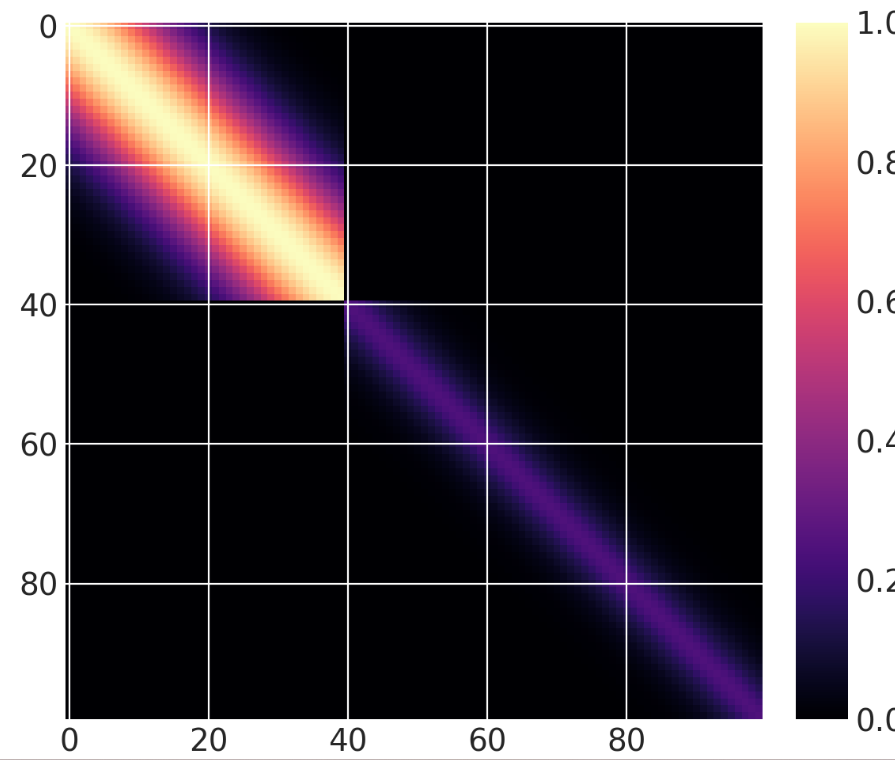

(The piecewise is from x<40 and x>40)

The heaviside step will give it a smoother transition at and around x=40

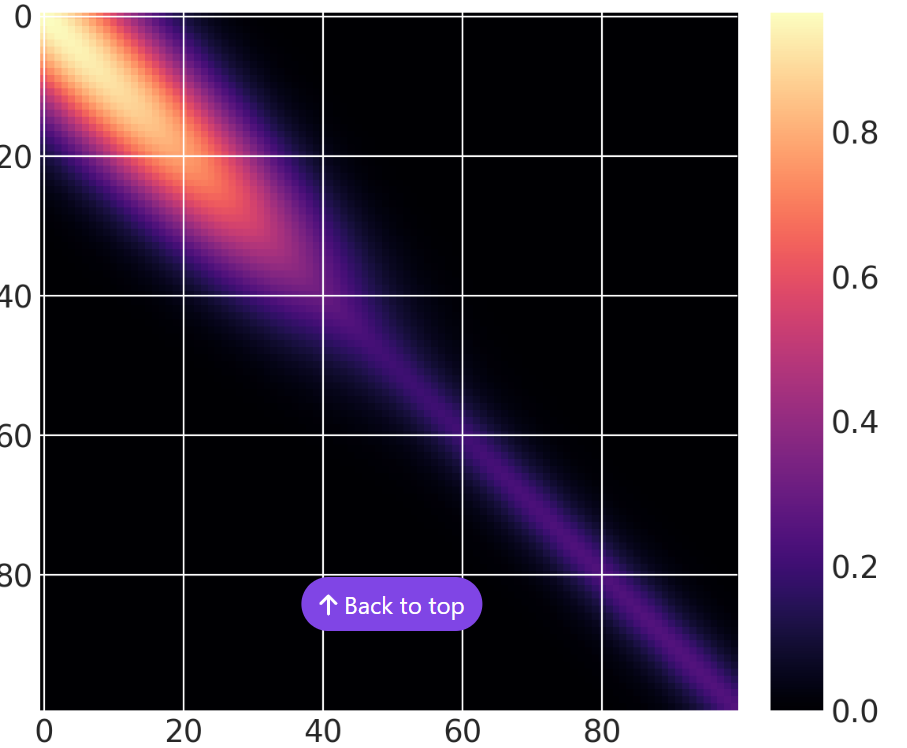

**Task7**:

Describe your favorite graph from the article in the previous task. Explain why its your favorite.

My favorite graph from the article was the last one (the most accurate one) because it shows the actual wave form of the model. Specifically, it shows the dip and rise of CO2 levels for each year instead of a pretty much straight line for each year. Also it just has pretty colors.

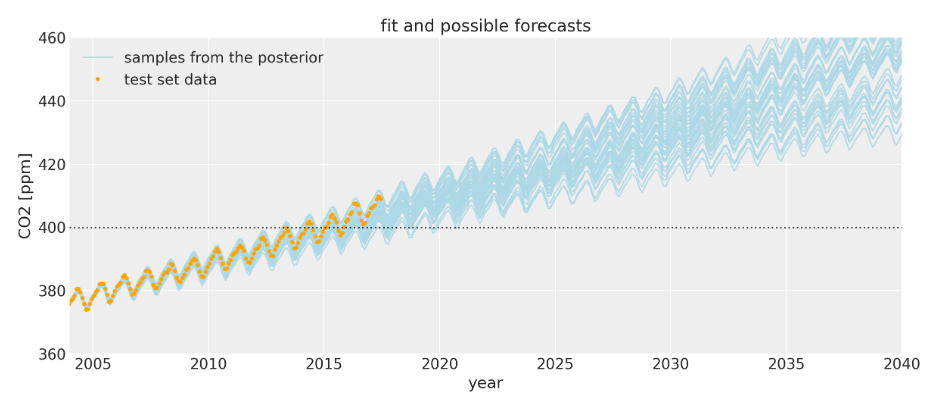